In [17]:
import os
import pandas as pd
#from medpy.io import load
#from medpy.metric import binary
#import nipype.interfaces.fsl as fsl
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import nibabel as nib
import seaborn as sns

In [18]:
%matplotlib inline

## Calculate WSU Test Set Evaluation Metrics

In [52]:
GTdir = 'test-GT-masks-WSU/'
Preddir = 'test-Pred-masks-WSU/binary/'
BETdir = 'test-BET-masks-WSU/'
SSdir = 'test-3dSkullStrip-masks-WSU/binary/'
AnatUNetdir = 'test-AnatUNet-masks-WSU/'
GTnames = [GTdir + name for name in os.listdir(GTdir)]
Prednames = [Preddir + name for name in os.listdir(Preddir)]
BETnames = [BETdir + name for name in os.listdir(BETdir)]
SSnames = [SSdir + name for name in os.listdir(SSdir)]
AnatUNetnames = [AnatUNetdir + name for name in os.listdir(AnatUNetdir)]

In [53]:
GTnames.sort()

In [54]:
Prednames.sort()

In [55]:
BETnames.sort()

In [56]:
SSnames.sort()

In [57]:
AnatUNetnames.sort()

In [ ]:
len(Prednames)

In [ ]:
len(GTnames)

In [ ]:
len(BETnames)

In [ ]:
len(SSnames)

In [ ]:
len(AnatUNetnames)

In [58]:
WSU_Pred_df = pd.DataFrame(columns=('File', 'Pred_Dice', 'Pred_Jaccard', 'Pred_HD(voxels)', 'Pred_Sensitivity', 'Pred_Specificity'))
for idx, GTname in enumerate(GTnames):
    GT_data, GT_header = load(GTnames[idx])
    Pred_data, Pred_header = load(Prednames[idx])
    dice = binary.dc(GT_data,Pred_data)
    jc = binary.jc(GT_data,Pred_data)
    hd = binary.hd(GT_data,Pred_data)
    sens = binary.sensitivity(GT_data,Pred_data)
    spec = binary.specificity(GT_data,Pred_data)
    TPR = binary.true_positive_rate(GT_data,Pred_data)
    TNR = binary.true_negative_rate(GT_data,Pred_data)
    vol_diff = binary.ravd(GT_data,Pred_data)
    WSU_Pred_df.loc[idx] = (GTname, dice, jc, hd, sens, spec)

In [59]:
WSU_Pred_df.describe()

,Pred_Dice,Pred_Jaccard,Pred_HD(voxels),Pred_Sensitivity,Pred_Specificity
count,206.000000,206.000000,206.000000,206.000000,206.000000
mean,0.943519,0.894362,3.466261,0.898577,0.999873
std,0.030167,0.045598,6.402712,0.039289,0.000736
min,0.596073,0.424575,1.414214,0.561922,0.989415
25%,0.936329,0.880280,2.000000,0.882743,0.999907
50%,0.948917,0.902799,2.236068,0.904858,0.999943
75%,0.958920,0.921083,3.000000,0.924351,0.999966
max,0.972995,0.947410,54.332311,0.958867,1.000000


In [60]:
WSU_BET_df = pd.DataFrame(columns=('File', 'BET_Dice', 'BET_Jaccard', 'BET_HD(voxels)', 'BET_Sensitivity', 'BET_Specificity'))
for idx, GTname in enumerate(GTnames):
    GT_data, GT_header = load(GTnames[idx])
    BET_data, BET_header = load(BETnames[idx])
    dice = binary.dc(GT_data,BET_data)
    jc = binary.jc(GT_data,BET_data)
    hd = binary.hd(GT_data,BET_data)
    sens = binary.sensitivity(GT_data,BET_data)
    spec = binary.specificity(GT_data,BET_data)
    WSU_BET_df.loc[idx] = (GTname, dice, jc, hd, sens, spec)

In [61]:
WSU_BET_df.describe()

,BET_Dice,BET_Jaccard,BET_HD(voxels),BET_Sensitivity,BET_Specificity
count,206.000000,206.000000,206.000000,206.000000,206.000000
mean,0.220224,0.129732,32.184385,0.129785,0.999628
std,0.125834,0.085560,10.476701,0.085579,0.002552
min,0.000000,0.000000,13.190906,0.000000,0.977588
25%,0.120639,0.064191,24.596647,0.064191,1.000000
50%,0.205116,0.114279,31.056399,0.114279,1.000000
75%,0.293628,0.172077,37.706100,0.172077,1.000000
max,0.583371,0.411803,63.015871,0.411912,1.000000


In [62]:
WSU_3dSS_df = pd.DataFrame(columns=('File', '3dSS_Dice', '3dSS_Jaccard', '3dSS_HD(voxels)', '3dSS_Sensitivity', '3dSS_Specificity'))
for idx, GTname in enumerate(GTnames):
    GT_data, GT_header = load(GTnames[idx])
    SS_data, SS_header = load(SSnames[idx])
    dice = binary.dc(GT_data,SS_data)
    jc = binary.jc(GT_data,SS_data)
    hd = binary.hd(GT_data,SS_data)
    sens = binary.sensitivity(GT_data,SS_data)
    spec = binary.specificity(GT_data,SS_data)
    WSU_3dSS_df.loc[idx] = (GTname, dice, jc, hd, sens, spec)

In [63]:
WSU_3dSS_df.describe()

,3dSS_Dice,3dSS_Jaccard,3dSS_HD(voxels),3dSS_Sensitivity,3dSS_Specificity
count,206.000000,206.000000,206.000000,206.000000,206.000000
mean,0.238408,0.139202,29.492450,0.139780,0.999125
std,0.101676,0.067487,7.442543,0.067643,0.002991
min,0.000456,0.000228,18.357560,0.000267,0.978649
25%,0.164886,0.089850,24.140200,0.090425,0.999691
50%,0.223015,0.125502,27.712789,0.125532,0.999950
75%,0.323914,0.193260,33.581974,0.193523,0.999993
max,0.505361,0.338115,55.235858,0.339579,1.000000


In [64]:
WSUmerge1 = pd.merge(WSU_Pred_df, WSU_BET_df)

In [65]:
WSUmerge2 = pd.merge(WSUmerge1, WSU_3dSS_df)

## Calculate Yale Test Set Evaluation Metrics

In [68]:
Yale_GTdir = 'test-GT-masks-Yale/'
Yale_Preddir = 'test-Pred-masks-Yale/binary/swapdim/'
Yale_BETdir = 'test-BET-masks-Yale/'
Yale_SSdir = 'test-3dSkullStrip-masks-Yale/binary/'
Yale_AnatUNetdir = 'test-AnatUNet-masks-Yale/'
Yale_GTnames = [Yale_GTdir + name for name in os.listdir(Yale_GTdir)]
Yale_Prednames = [Yale_Preddir + name for name in os.listdir(Yale_Preddir)]
Yale_BETnames = [Yale_BETdir + name for name in os.listdir(Yale_BETdir)]
Yale_SSnames = [Yale_SSdir + name for name in os.listdir(Yale_SSdir)]
Yale_AnatUNetnames = [Yale_AnatUNetdir + name for name in os.listdir(Yale_AnatUNetdir)]

In [69]:
Yale_GTnames.sort()

In [70]:
Yale_Prednames.sort()

In [71]:
Yale_BETnames.sort()

In [72]:
Yale_SSnames.sort()

In [73]:
Yale_AnatUNetnames.sort()

In [ ]:
len(Yale_Prednames)

In [ ]:
len(Yale_GTnames)

In [ ]:
len(Yale_BETnames)

In [ ]:
len(Yale_SSnames)

In [ ]:
len(Yale_AnatUNetnames)

In [112]:
Yale_Pred_df = pd.DataFrame(columns=('File', 'Pred_Dice', 'Pred_Jaccard', 'Pred_HD(voxels)', 'Pred_Sensitivity', 'Pred_Specificity'))
for idx, Yale_GTname in enumerate(Yale_GTnames):
    Yale_GT_data, Yale_GT_header = load(Yale_GTnames[idx])
    Yale_Pred_data, Yale_Pred_header = load(Yale_Prednames[idx])
    dice = binary.dc(Yale_GT_data,Yale_Pred_data)
    jc = binary.jc(Yale_GT_data,Yale_Pred_data)
    hd = binary.hd(Yale_GT_data,Yale_Pred_data)
    sens = binary.sensitivity(Yale_GT_data,Yale_Pred_data)
    spec = binary.specificity(Yale_GT_data,Yale_Pred_data)
    Yale_Pred_df.loc[idx] = (Yale_GTname, dice, jc, hd, sens, spec)

In [113]:
Yale_Pred_df.describe()

,Pred_Dice,Pred_Jaccard,Pred_HD(voxels),Pred_Sensitivity,Pred_Specificity
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.891578,0.818759,5.502982,0.838958,0.999193
std,0.130196,0.126672,11.010951,0.120448,0.002723
min,0.000000,0.000000,2.000000,0.000000,0.981927
25%,0.907153,0.830084,2.449490,0.840032,0.999874
50%,0.916446,0.845778,3.000000,0.853231,0.999970
75%,0.926167,0.862487,4.123106,0.865322,0.999991
max,0.944693,0.895182,76.223356,0.899281,1.000000


In [76]:
Yale_BET_df = pd.DataFrame(columns=('File', 'BET_Dice', 'BET_Jaccard', 'BET_HD(voxels)', 'BET_Sensitivity', 'BET_Specificity'))
for idx, Yale_GTname in enumerate(Yale_GTnames):
    Yale_GT_data, Yale_GT_header = load(Yale_GTnames[idx])
    Yale_BET_data, Yale_BET_header = load(Yale_BETnames[idx])
    dice = binary.dc(Yale_GT_data,Yale_BET_data)
    jc = binary.jc(Yale_GT_data,Yale_BET_data)
    hd = binary.hd(Yale_GT_data,Yale_BET_data)
    sens = binary.sensitivity(Yale_GT_data,Yale_BET_data)
    spec = binary.specificity(Yale_GT_data,Yale_BET_data)
    Yale_BET_df.loc[idx] = (Yale_GTname, dice, jc, hd, sens, spec)

In [77]:
Yale_BET_df.describe()

,BET_Dice,BET_Jaccard,BET_HD(voxels),BET_Sensitivity,BET_Specificity
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.222137,0.125998,27.197802,0.126674,0.998439
std,0.055698,0.034279,8.625698,0.033525,0.004379
min,0.004408,0.002209,14.866069,0.002617,0.980310
25%,0.192533,0.106521,20.862519,0.107124,0.999812
50%,0.227897,0.128602,26.076781,0.128828,1.000000
75%,0.259946,0.149391,28.343928,0.151133,1.000000
max,0.308524,0.182399,49.588305,0.182399,1.000000


In [78]:
Yale_3dSS_df = pd.DataFrame(columns=('File', '3dSS_Dice', '3dSS_Jaccard', '3dSS_HD(voxels)', '3dSS_Sensitivity', '3dSS_Specificity'))
for idx, Yale_GTname in enumerate(Yale_GTnames):
    Yale_GT_data, Yale_GT_header = load(Yale_GTnames[idx])
    Yale_SS_data, Yale_BET_header = load(Yale_SSnames[idx])
    dice = binary.dc(Yale_GT_data,Yale_SS_data)
    jc = binary.jc(Yale_GT_data,Yale_SS_data)
    hd = binary.hd(Yale_GT_data,Yale_SS_data)
    sens = binary.sensitivity(Yale_GT_data,Yale_SS_data)
    spec = binary.specificity(Yale_GT_data,Yale_SS_data)
    Yale_3dSS_df.loc[idx] = (Yale_GTname, dice, jc, hd, sens, spec)

In [79]:
Yale_3dSS_df.describe()

,3dSS_Dice,3dSS_Jaccard,3dSS_HD(voxels),3dSS_Sensitivity,3dSS_Specificity
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.254807,0.148280,26.495356,0.148982,0.999050
std,0.077397,0.052518,6.893871,0.052956,0.002774
min,0.007284,0.003655,15.264338,0.004470,0.980785
25%,0.224222,0.126268,21.656073,0.128181,0.999076
50%,0.248625,0.141960,25.971136,0.142008,0.999887
75%,0.270666,0.156515,30.366251,0.157389,0.999994
max,0.490708,0.325125,44.485953,0.330183,1.000000


In [114]:
Yalemerge1 = pd.merge(Yale_Pred_df, Yale_BET_df)

In [115]:
Yalemerge2 = pd.merge(Yalemerge1, Yale_3dSS_df)

In [116]:
Fullmerge = pd.merge(WSUmerge2, Yalemerge2, how='outer')

In [117]:
Fullmerge.columns

Index(['File', 'Pred_Dice', 'Pred_Jaccard', 'Pred_HD(voxels)',
       'Pred_Sensitivity', 'Pred_Specificity', 'BET_Dice', 'BET_Jaccard',
       'BET_HD(voxels)', 'BET_Sensitivity', 'BET_Specificity', '3dSS_Dice',
       '3dSS_Jaccard', '3dSS_HD(voxels)', '3dSS_Sensitivity',
       '3dSS_Specificity'],
      dtype='object')

In [118]:
temp_subs = Fullmerge['File'].str.rsplit("_", n=3, expand=True)

In [119]:
Fullmerge['Subject'] = temp_subs[1]
Fullmerge['Run'] = temp_subs[2]
Fullmerge['Volume'] = temp_subs[3]

In [ ]:
Fullmerge

## Failure Analysis: Inspect all masks w/ Dice < 0.9

In [123]:
failures = Fullmerge[Fullmerge['Pred_Dice'] < 0.9]

,File,Pred_Dice,Pred_Jaccard,Pred_HD(voxels),Pred_Sensitivity,Pred_Specificity,BET_Dice,BET_Jaccard,BET_HD(voxels),BET_Sensitivity,BET_Specificity,3dSS_Dice,3dSS_Jaccard,3dSS_HD(voxels),3dSS_Sensitivity,3dSS_Specificity,Subject,Run,Volume
6,test-GT-masks-WSU/mask_zpr_2019-T1_run1_vol012...,0.890505,0.802622,2.828427,0.813284,0.999947,0.042254,0.021583,30.675723,0.021583,1.000000,0.052004,0.026696,30.364453,0.026696,1.000000,2019-T1,run1,vol0121.nii.gz
7,test-GT-masks-WSU/mask_zpr_2019-T1_run1_vol015...,0.890770,0.803052,3.741657,0.812500,0.999953,0.041728,0.021309,30.805844,0.021309,1.000000,0.054287,0.027901,29.966648,0.027901,1.000000,2019-T1,run1,vol0150.nii.gz
9,test-GT-masks-WSU/mask_zpr_2019-T1_run2_vol017...,0.888273,0.799002,3.162278,0.807055,0.999959,0.043005,0.021975,31.048349,0.021975,1.000000,0.053341,0.027402,31.208973,0.027402,1.000000,2019-T1,run2,vol0170.nii.gz
37,test-GT-masks-WSU/mask_zpr_2040-T1_run2_vol002...,0.896150,0.811840,3.605551,0.815707,0.999895,0.000000,0.000000,57.853263,0.000000,0.979148,0.009514,0.004780,55.072679,0.005459,0.980659,2040-T1,run2,vol0020.nii.gz
205,test-GT-masks-WSU/mask_zpr_2228-T2_me123_vol03...,0.596073,0.424575,7.681146,0.561922,0.989415,0.231161,0.130685,22.671568,0.130685,1.000000,0.281553,0.163841,21.610183,0.163889,0.999940,2228-T2,me123,vol0330.nii.gz
215,test-GT-masks-Yale/bin_mask_zpr_FS0004_S005_vo...,0.844461,0.730795,7.549834,0.795871,0.998521,0.177219,0.097225,26.720778,0.097403,0.999688,0.211734,0.118402,26.419690,0.119127,0.999201,FS0004,S005,vol0100.nii.gz
216,test-GT-masks-Yale/bin_mask_zpr_FS0004_S007_vo...,0.890095,0.801956,4.123106,0.828562,0.999412,0.183473,0.101002,27.166155,0.101156,0.999739,0.214819,0.120335,25.961510,0.121243,0.999004,FS0004,S007,vol0100.nii.gz
225,test-GT-masks-Yale/bin_mask_zpr_FS0006_S003_vo...,0.810984,0.682064,5.744563,0.861580,0.995629,0.277969,0.161419,19.104973,0.161419,1.000000,0.171884,0.094022,32.171416,0.094108,0.999782,FS0006,S003,vol0100.nii.gz
226,test-GT-masks-Yale/bin_mask_zpr_FS0006_S005_vo...,0.800875,0.667883,6.000000,0.863748,0.995371,0.282262,0.164322,22.135944,0.164576,0.999813,0.162802,0.088614,31.953091,0.088631,0.999952,FS0006,S005,vol0100.nii.gz
227,test-GT-masks-Yale/bin_mask_zpr_FS0006_S006_vo...,0.803805,0.671968,7.000000,0.891364,0.995070,0.259021,0.148779,26.038433,0.151100,0.998098,0.164960,0.089894,31.953091,0.089947,0.999853,FS0006,S006,vol0100.nii.gz


## Calculate auto-mask volume

In [25]:
import nibabel as nb
import numpy as np

In [48]:
WSU_mask_df = pd.DataFrame(columns=('File', 'MaskVolume'))
for idx, Predname in enumerate(Prednames):
    WSU_mask = nb.load(Prednames[idx])
    num_vox = np.sum(WSU_mask.get_data() > 0)
    WSU_mask_df.loc[idx]= (Predname, num_vox)

In [34]:
Yale_mask_df = pd.DataFrame(columns=('File', 'MaskVolume'))
for idx, Yale_Predname in enumerate(Yale_Prednames):
    Yale_mask = nb.load(Yale_Prednames[idx])
    num_vox = np.sum(Yale_mask.get_data() > 0)
    Yale_mask_df.loc[idx]= (Yale_Predname, num_vox)

In [124]:
Maskmerge = pd.merge(WSU_mask_df, Yale_mask_df, how='outer')

In [126]:
temp_masksubs = Maskmerge['File'].str.rsplit("_", n=3, expand=True)

In [128]:
Maskmerge['Subject'] = temp_subs[1]
Maskmerge['Run'] = temp_subs[2]
Maskmerge['Volume'] = temp_subs[3]

In [130]:
Maskmerge.columns

Index(['File', 'MaskVolume', 'Subject', 'Run', 'Volume'], dtype='object')

In [131]:
Fullmerge.columns

Index(['File', 'Pred_Dice', 'Pred_Jaccard', 'Pred_HD(voxels)',
       'Pred_Sensitivity', 'Pred_Specificity', 'BET_Dice', 'BET_Jaccard',
       'BET_HD(voxels)', 'BET_Sensitivity', 'BET_Specificity', '3dSS_Dice',
       '3dSS_Jaccard', '3dSS_HD(voxels)', '3dSS_Sensitivity',
       '3dSS_Specificity', 'Subject', 'Run', 'Volume'],
      dtype='object')

In [146]:
Finalmerge = pd.merge(Fullmerge, Maskmerge, on=['Subject','Run','Volume'], how='outer')

In [147]:
Finalmerge.columns

Index(['File_x', 'Pred_Dice', 'Pred_Jaccard', 'Pred_HD(voxels)',
       'Pred_Sensitivity', 'Pred_Specificity', 'BET_Dice', 'BET_Jaccard',
       'BET_HD(voxels)', 'BET_Sensitivity', 'BET_Specificity', '3dSS_Dice',
       '3dSS_Jaccard', '3dSS_HD(voxels)', '3dSS_Sensitivity',
       '3dSS_Specificity', 'Subject', 'Run', 'Volume', 'File_y', 'MaskVolume'],
      dtype='object')

In [148]:
Finalmerge.to_csv('All_Metrics.csv',index=False, index_label=None)

## Explore the relationships between mask volume & evaluation metrics

In [12]:
import scipy.stats  as stats

In [141]:
stats.pearsonr(testmerge['MaskVolume'], testmerge['Pred_Dice'])

(0.2305197139828305, 0.00018760761296351014)

In [142]:
stats.pearsonr(testmerge['MaskVolume'], testmerge['Pred_Jaccard'])

(0.26569548346441796, 1.5255479602989552e-05)

In [143]:
stats.pearsonr(testmerge['MaskVolume'], testmerge['Pred_HD(voxels)'])

(-0.04791920046264553, 0.44343878673592235)

In [144]:
stats.pearsonr(testmerge['MaskVolume'], testmerge['Pred_Sensitivity'])

(0.2629722245132705, 1.8773383849752945e-05)

In [145]:
stats.pearsonr(testmerge['MaskVolume'], testmerge['Pred_Specificity'])

(0.11170111789992458, 0.07328003992016054)

## Explore the relationships between fetal age & evaluation metrics

In [2]:
age = pd.read_csv('All_Age.csv')

In [3]:
metrics = pd.read_csv('All_Metrics2.csv')

In [4]:
age.columns

Index(['Subject', 'Age', 'Run', 'Volume'], dtype='object')

In [5]:
metrics.columns

Index(['File_x', 'Pred_Dice', 'Pred_Jaccard', 'Pred_HD(voxels)',
       'Pred_Sensitivity', 'Pred_Specificity', 'BET_Dice', 'BET_Jaccard',
       'BET_HD(voxels)', 'BET_Sensitivity', 'BET_Specificity', '3dSS_Dice',
       '3dSS_Jaccard', '3dSS_HD(voxels)', '3dSS_Sensitivity',
       '3dSS_Specificity', 'Subject', 'Run', 'Volume', 'File_y', 'MaskVolume'],
      dtype='object')

In [6]:
age_metrics = pd.merge(age, metrics, how='inner')

In [7]:
len(age_metrics)

256

In [8]:
age_metrics.columns

Index(['Subject', 'Age', 'Run', 'Volume', 'File_x', 'Pred_Dice',
       'Pred_Jaccard', 'Pred_HD(voxels)', 'Pred_Sensitivity',
       'Pred_Specificity', 'BET_Dice', 'BET_Jaccard', 'BET_HD(voxels)',
       'BET_Sensitivity', 'BET_Specificity', '3dSS_Dice', '3dSS_Jaccard',
       '3dSS_HD(voxels)', '3dSS_Sensitivity', '3dSS_Specificity', 'File_y',
       'MaskVolume'],
      dtype='object')

In [9]:
age_metrics.dropna(inplace=True)

In [10]:
len(age_metrics)

252

In [13]:
stats.pearsonr(age_metrics['Age'], age_metrics['Pred_Dice'])

(0.14078872674914739, 0.025418407106557912)

In [24]:
stats.pearsonr(age_metrics['Age'], age_metrics['Pred_Jaccard'])

(0.15382618725271902, 0.014511729997237403)

In [27]:
stats.pearsonr(age_metrics['Age'], age_metrics['Pred_Sensitivity'])

(0.24228996017607962, 0.00010226328502710109)

In [14]:
stats.pearsonr(age_metrics['Age'], age_metrics['MaskVolume'])

(0.8407529773387409, 1.44713709486466e-68)

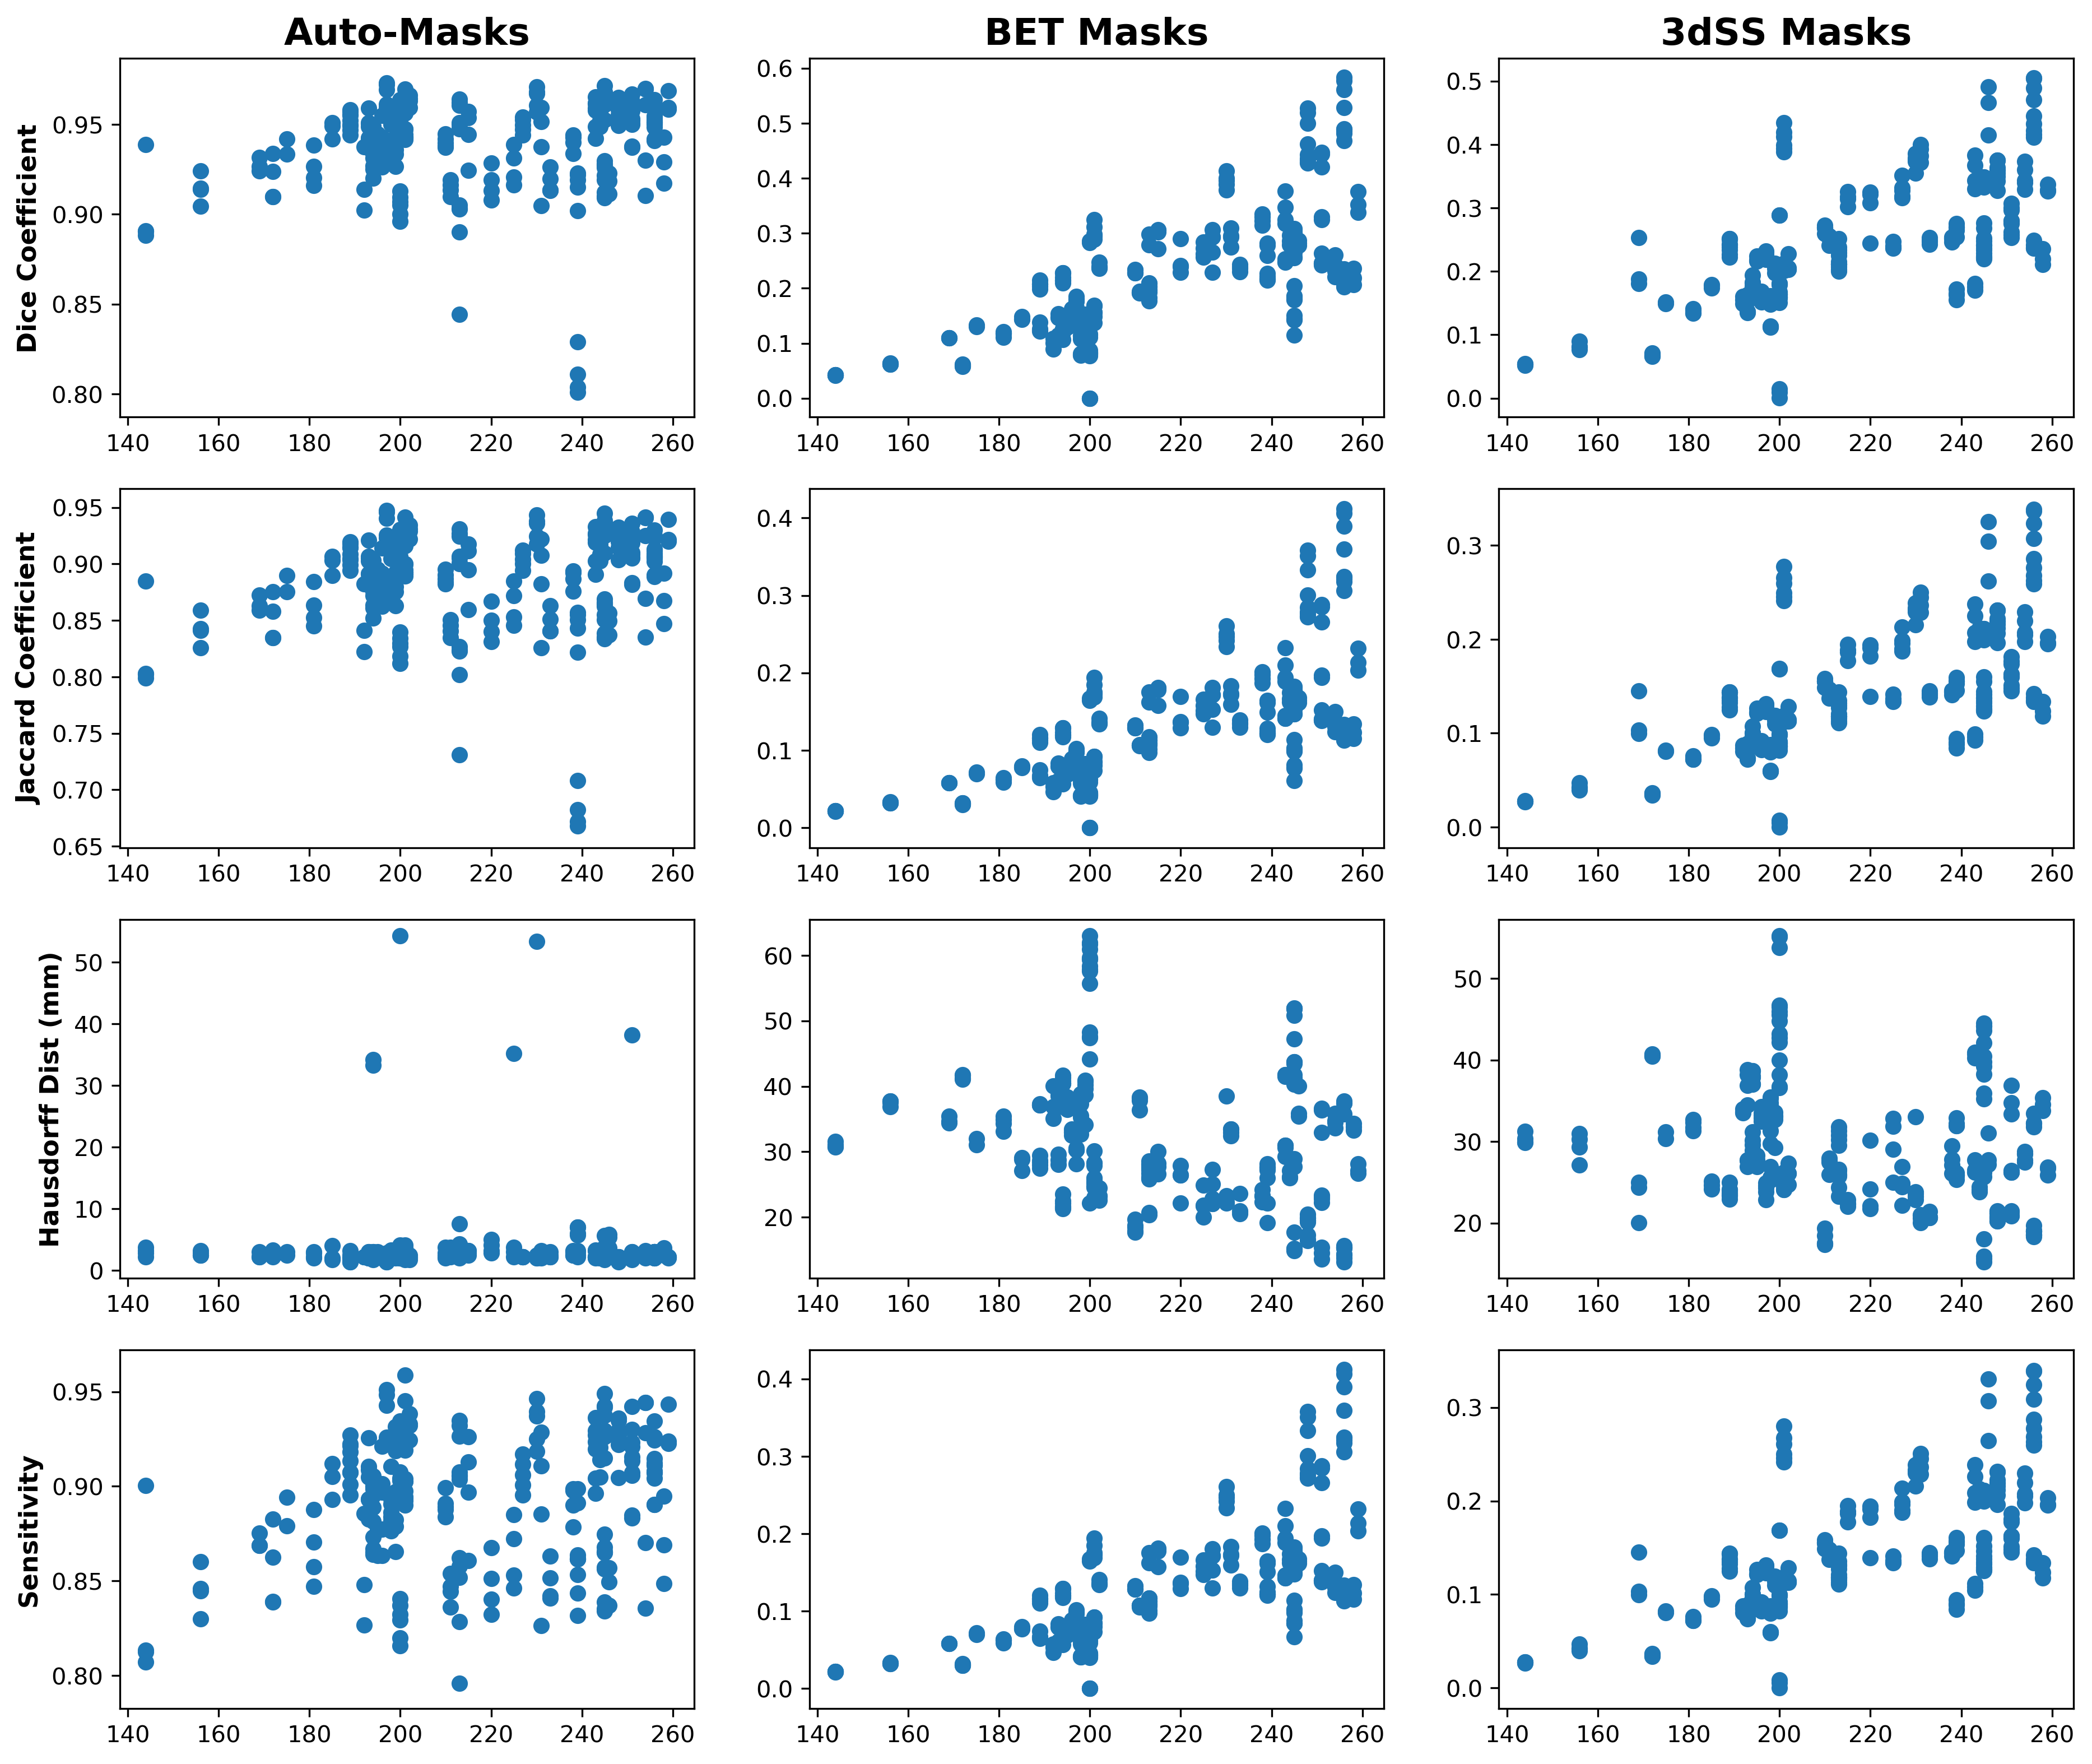

In [19]:
fig = plt.figure(figsize = (15, 13), dpi=300)

ax1 = fig.add_subplot(4, 3, 1)
ax1.scatter(age_metrics['Age'], age_metrics['Pred_Dice'])
ax1.set_title('Auto-Masks',fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax1.set_ylabel('Dice Coefficient',fontdict={'fontsize': 11, 'fontweight': 'bold'})

ax2 = fig.add_subplot(4, 3, 2)
ax2.scatter(age_metrics['Age'], age_metrics['BET_Dice'])
ax2.set_title('BET Masks',fontdict={'fontsize': 16, 'fontweight': 'bold'})

ax3 = fig.add_subplot(4, 3, 3)
ax3.scatter(age_metrics['Age'], age_metrics['3dSS_Dice'])
ax3.set_title('3dSS Masks',fontdict={'fontsize': 16, 'fontweight': 'bold'})

ax4 = fig.add_subplot(4, 3, 4)
ax4.scatter(age_metrics['Age'], age_metrics['Pred_Jaccard'])
ax4.set_ylabel('Jaccard Coefficient',fontdict={'fontsize': 11, 'fontweight': 'bold'})

ax5 = fig.add_subplot(4, 3, 5)
ax5.scatter(age_metrics['Age'], age_metrics['BET_Jaccard'])

ax6 = fig.add_subplot(4, 3, 6)
ax6.scatter(age_metrics['Age'], age_metrics['3dSS_Jaccard'])

ax7 = fig.add_subplot(4, 3, 7)
ax7.scatter(age_metrics['Age'], age_metrics['Pred_HD(voxels)'])
ax7.set_ylabel('Hausdorff Dist (mm)',fontdict={'fontsize': 11, 'fontweight': 'bold'})

ax8 = fig.add_subplot(4, 3, 8)
ax8.scatter(age_metrics['Age'], age_metrics['BET_HD(voxels)'])

ax9 = fig.add_subplot(4, 3, 9)
ax9.scatter(age_metrics['Age'], age_metrics['3dSS_HD(voxels)'])

ax10 = fig.add_subplot(4, 3, 10)
ax10.scatter(age_metrics['Age'], age_metrics['Pred_Sensitivity'])
ax10.set_ylabel('Sensitivity',fontdict={'fontsize': 11, 'fontweight': 'bold'})

ax11 = fig.add_subplot(4, 3, 11)
ax11.scatter(age_metrics['Age'], age_metrics['BET_Sensitivity'])

ax12 = fig.add_subplot(4, 3, 12)
ax12.scatter(age_metrics['Age'], age_metrics['3dSS_Sensitivity'])

#plt.show()
#plt.savefig('../../../Desktop/EvalAllAge.png',bbox_inches='tight')

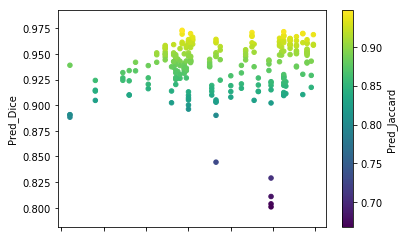

In [20]:
ax2 = age_metrics.plot.scatter(x='Age',
...                       y='Pred_Dice',
...                       c='Pred_Jaccard',
...                       colormap='viridis')

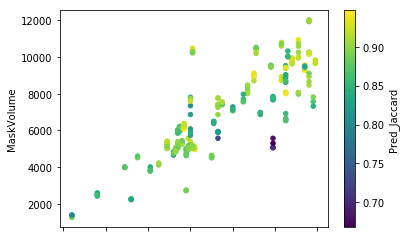

In [21]:
ax3 = age_metrics.plot.scatter(x='Age',
...                       y='MaskVolume',
...                       c='Pred_Jaccard',
...                       colormap='viridis')

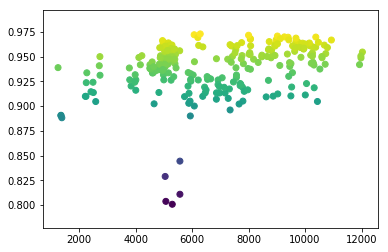

In [39]:
ax4 = plt.scatter(x=age_metrics['MaskVolume'],
...                       y=age_metrics['Pred_Dice'],
...                       c=age_metrics['Pred_Jaccard'], label=age_metrics['Pred_Jaccard'])
#ax4.set_xlabel("Mask Volume")
#ax4.set_ylabel("Dice Coefficient")